# EDA para información entregada por Sernapesca

#### Introducción
Este Notebook corresponde al análisis exploratorio del archivo enviado por sernapesca llamado "RNA.xlsx", el cual es extraido desde una platadorma interna denominada Reporteador. 
 
Resumen:
* Tiene una dimensión de (5765, 18).
* Este archivo es una tabla con de los centros de cultivos.
* Es para las regiones 1, 15, 2, 3, 4, 5, 6, 7, 8, 16, 9, 14, 10, 11, 12, 13
* Sólo distintos tipos de cultivos.

### Import libreries

In [5]:
import logging
import subprocess
import os   
import pandas as pd
import seaborn as sns

### Reading file "Ingresos"

In [8]:
%%time
RNA_raw = pd.read_excel("../data/datos_nelson/RNA.XLSX")

CPU times: total: 1.86 s
Wall time: 1.9 s


In [10]:
RNA_raw.shape

(5765, 18)

In [9]:
RNA_raw.head()

,Región,Sector,Nm_Provincia,Comuna Centro,Nombre Area,Codigo Centro,Nombre Centro,Categoria,N° Folio RNA,Rut,Propietario,Dirección,Comuna Propietario,Tipo Cultivo,Cuerpo de Agua,Latitud,Longitud,Tipo Propietario
0,1,CALETA SARMENIA,Iquique,Iquique,NaN,10001,SARMENIA CULTIVOS MARINOS LTDA,INSCRITO,8.0,89785000-1,SARMENIA CULTIVOS MARINOS LTDA.,ZEGERS N° 249,Iquique,CERRADO,,20.469542,70.160902,Empresa
1,1,CALETA CHIPANA,Iquique,Iquique,NaN,10002,*,EN TRAMITE,NaN,89785000-1,SARMENIA CULTIVOS MARINOS LTDA.,ZEGERS N° 249,Iquique,CERRADO,NaN,21.341667,70.088889,Empresa
2,1,CALETA BAJO MOLLE,Iquique,Iquique,NaN,10005,FUNDACION ALMIRANTE CARLOS CONDELL,INSCRITO,1.0,71142500-4,FUNDACION ALMIRANTE CARLOS CONDELL,JUAN GUILLERMOS N° 40,Chonchi,CERRADO,,20.283333,70.150000,Fundacion
3,1,CAMPUS HUAYQUIQUE,Iquique,Iquique,NaN,10009,*,CADUCADO,NaN,70777500-9,UNIVERSIDAD ARTURO PRAT,AV. ARTURM PRAT N° 2120,Iquique,CERRADO,NaN,NaN,NaN,Universidad
4,15,CALETA QUIANE,Arica,Arica,NaN,10010,*,CADUCADO,NaN,96534690-2,NOVAMAR S.A.,BARROS ARANA 2440,Arica,HATCHERY,NaN,NaN,NaN,Empresa


In [11]:
RNA_raw.columns.to_list()

['Región',
 'Sector',
 'Nm_Provincia',
 'Comuna Centro',
 'Nombre Area',
 'Codigo Centro',
 'Nombre Centro',
 'Categoria',
 'N° Folio RNA',
 'Rut',
 'Propietario',
 'Dirección',
 'Comuna Propietario',
 'Tipo Cultivo',
 'Cuerpo de Agua',
 'Latitud',
 'Longitud',
 'Tipo Propietario']

In [12]:
RNA_raw.info

<bound method DataFrame.info of       Región                                       Sector     Nm_Provincia  \
0          1                              CALETA SARMENIA          Iquique   
1          1                               CALETA CHIPANA          Iquique   
2          1                            CALETA BAJO MOLLE          Iquique   
3          1                            CAMPUS HUAYQUIQUE          Iquique   
4         15                                CALETA QUIANE            Arica   
...      ...                                          ...              ...   
5760      11                       AMERB MENINEA SECTOR A            Aysén   
5761      11           SENO GALA AL SUR DE PINS. MELIMOYU            Aysén   
5762      14  SEC. PTO. RANQUIL, AL E. DE PTA. EL MANZANO         Valdivia   
5763      14                        AAMERB PUNTA ÑUMPULLI         Valdivia   
5764      99                              NO IDENTIFICADO  No Identificado   

        Comuna Centro Nombre Ar

In [13]:
RNA_raw.describe()

,Región,Codigo Centro,N° Folio RNA,Latitud,Longitud
count,5765.000000,5765.000000,5018.000000,5037.000000,5037.000000
mean,9.845447,117066.634692,14835.302112,40.213616,70.607165
std,2.688078,97416.645008,10059.928464,8.995552,13.298593
min,1.000000,10001.000000,0.000000,0.000000,0.000000
25%,10.000000,101074.000000,5004.250000,41.585569,72.682544
50%,10.000000,102864.000000,20760.500000,42.124206,73.418914
75%,10.000000,104402.000000,22746.750000,43.122178,73.630681
max,99.000000,999999.000000,248851.000000,55.061439,74.687447


In [14]:
RNA_raw.duplicated().sum()

0

In [15]:
RNA_raw.isnull().sum()

Región                   0
Sector                   7
Nm_Provincia             0
Comuna Centro            0
Nombre Area           4236
Codigo Centro            0
Nombre Centro           50
Categoria                0
N° Folio RNA           747
Rut                      0
Propietario              0
Dirección                1
Comuna Propietario       1
Tipo Cultivo             0
Cuerpo de Agua        4040
Latitud                728
Longitud               728
Tipo Propietario         0
dtype: int64

In [16]:
RNA_raw.dtypes

Región                  int64
Sector                 object
Nm_Provincia           object
Comuna Centro          object
Nombre Area            object
Codigo Centro           int64
Nombre Centro          object
Categoria              object
N° Folio RNA          float64
Rut                    object
Propietario            object
Dirección              object
Comuna Propietario     object
Tipo Cultivo           object
Cuerpo de Agua         object
Latitud               float64
Longitud              float64
Tipo Propietario       object
dtype: object

In [19]:
RNA_raw['Codigo Centro'].nunique()

5765

In [26]:
#RNA_raw['Categoria'].unique().tolist()
#RNA_raw['Tipo Propietario'].unique().tolist()
RNA_raw['Región'].unique().tolist()

#RNA_raw['Tipo Cultivo'].unique().tolist()



[1, 15, 2, 3, 4, 5, 6, 7, 8, 16, 9, 14, 10, 11, 99, 12, 13]

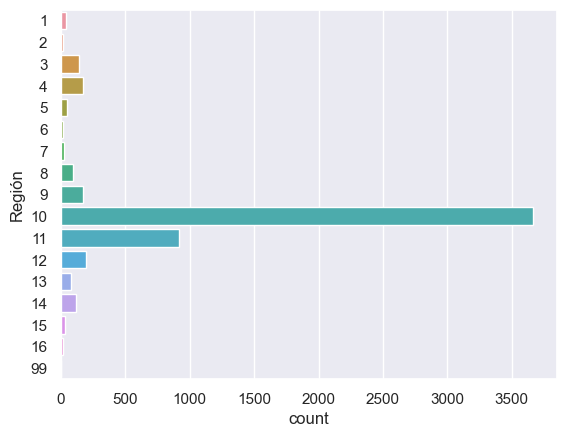

In [27]:
def count_clases(column_name):
    sns.set_theme(style="darkgrid")
    ax = sns.countplot(y=column_name, data=RNA_raw)
    sns.set(rc = {'figure.figsize':(25,8)})
    #for item in ax.get_xticklabels():
    #    item.set_rotation(90)

count_clases('Región')

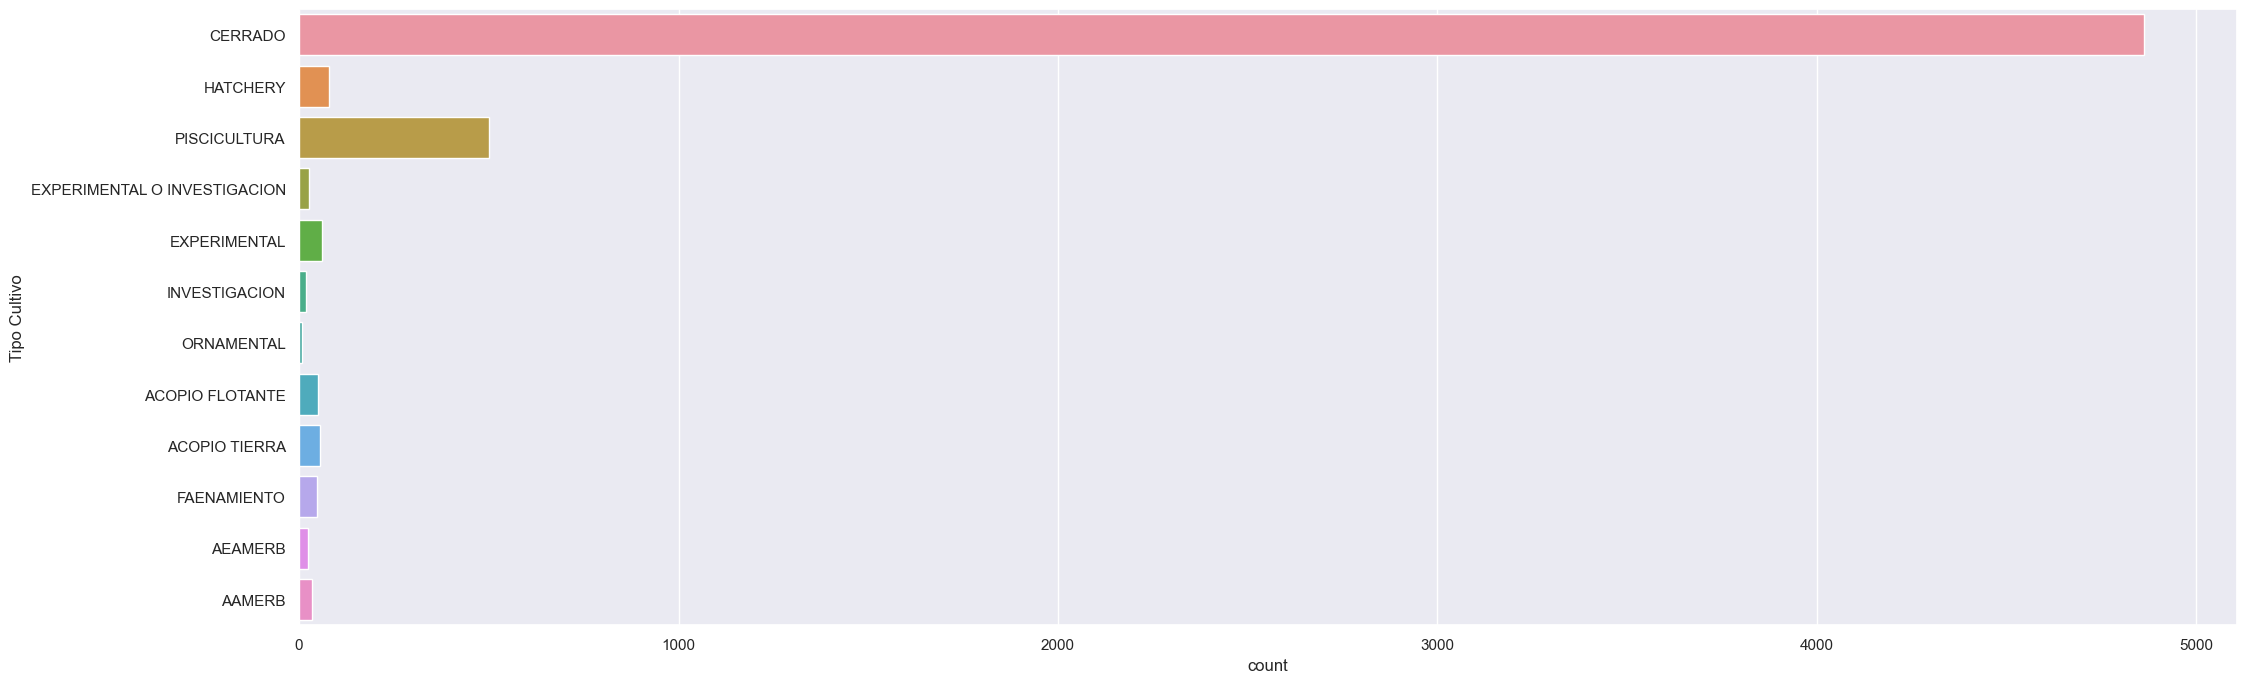

In [28]:
count_clases('Tipo Cultivo')

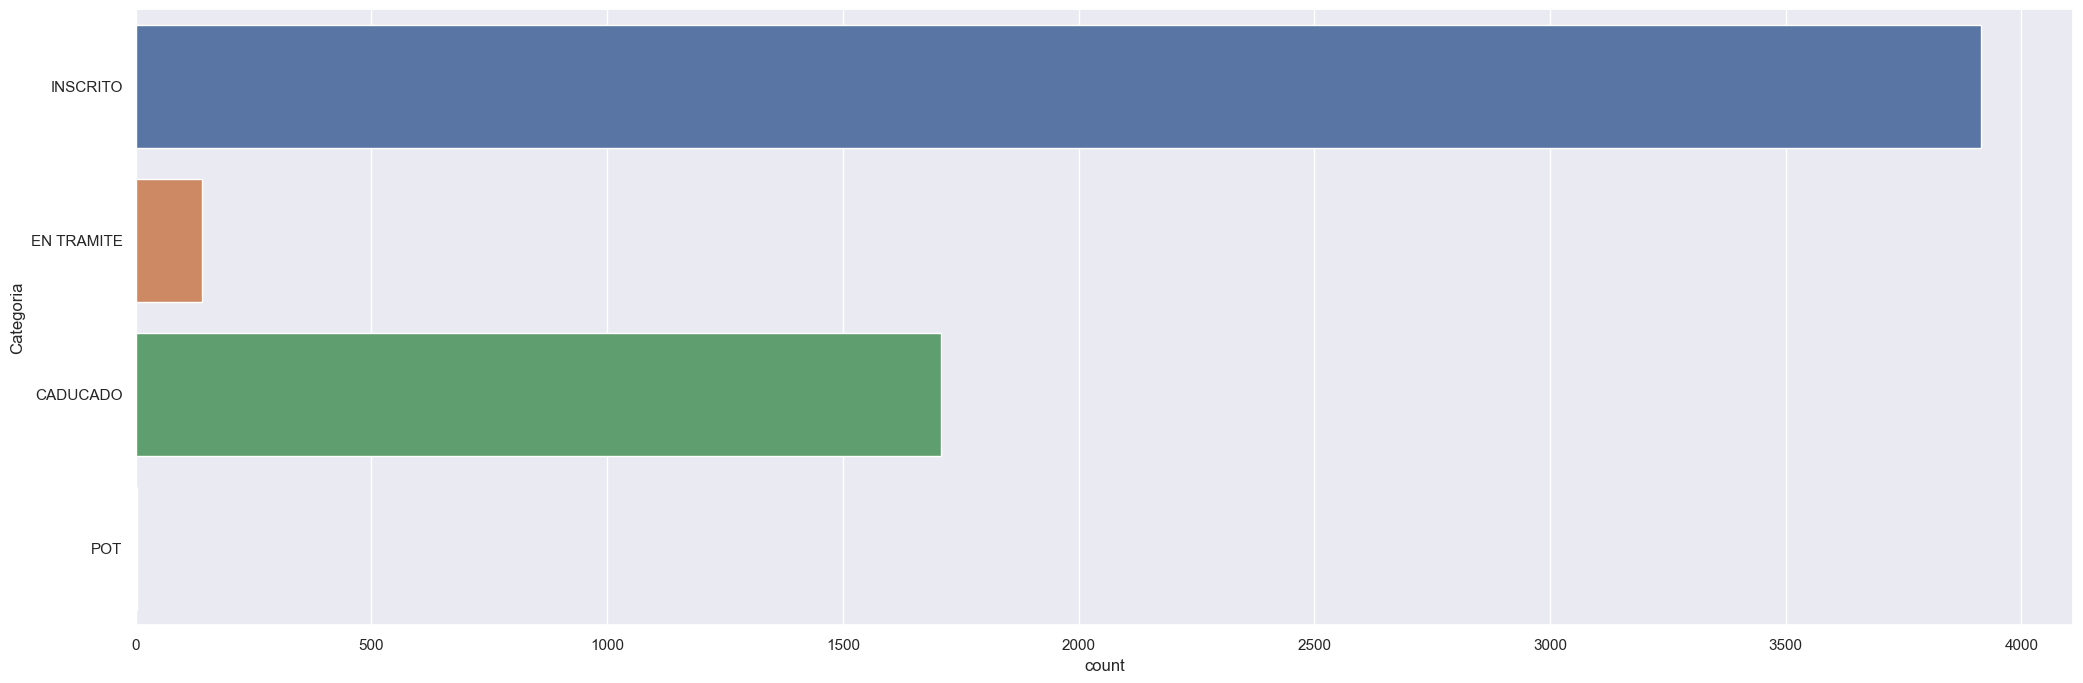

In [29]:
count_clases('Categoria')

In [58]:
RNA_raw['Origen'].unique().tolist()

['Declarar Existencias de Especies de Cultivo con Aut. Movimiento',
 'Declarar Existencias de Especies de Cultivo por Importación o  Autoabastecimiento',
 'Ingresos por diferencia',
 'Otros',
 'Centro de Cultivo',
 'Área de Manejo',
 'Comercializadora']

In [59]:
RNA_raw.head()

,ACS,Codigo Centro,Propietario,Nombre Sector,Tipo Cultivo,Tipo Agua,Año,Mes,Región,Provincia,...,Cod. Especie,Especie,Etapa,Unidades,Kilos,Origen,Cod. Origen,Nombre Origen,Tipo Especie,Sistema Ingreso
0,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,311,TRUCHA ARCOIRIS,ADULTOS,24146.0,82555.0,Declarar Existencias de Especies de Cultivo co...,120191.0,AUSTRALIS MAR S.A.,PECES,SIFA
1,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,311,TRUCHA ARCOIRIS,ADULTOS,24172.0,82644.0,Declarar Existencias de Especies de Cultivo co...,120191.0,AUSTRALIS MAR S.A.,PECES,SIFA
2,modif descanso 2,500014,RIO DULCE S.A.,"SAN ANTONIO, SEIS SECTORES",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,301,SALMON DEL ATLANTICO,ADULTOS,13002.0,87113.0,Declarar Existencias de Especies de Cultivo co...,110340.0,COOKE AQUACULTURE CHILE S.A.,PECES,SIFA
3,ACS 7,500035,MAINSTREAM CHILE S.A.,"PUERTO FERNANDEZ, QUEMCHI",ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,301,SALMON DEL ATLANTICO,ADULTOS,36908.0,235.0,Declarar Existencias de Especies de Cultivo co...,110758.0,CERMAQ CHILE S.A.,PECES,SIFA
4,ACS 10 B,500019,ANTARFOOD S.A.,CANAL YAL,ACOPIO FLOTANTE,Mar,2021,1,10,Chiloé,...,302,SALMON PLATEADO O COHO,ADULTOS,9084.0,35.0,Declarar Existencias de Especies de Cultivo co...,110591.0,EXPORTADORA LOS FIORDOS LTDA.,PECES,SIFA


In [76]:
#len(RNA_raw)
q_centros_ingresos = len(RNA_raw['Codigo Centro'].unique().tolist())
q_centros_origen = len(RNA_raw['Cod. Origen'].unique().tolist())
print(f'En total existen {q_centros_ingresos} lugares de ingresos y {q_centros_origen} lugares de origen ' )

En total existen 1211 lugares de ingresos y 935 lugares de origen 
